### Importing Required Libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading datasets

In [24]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

### Displaying first few rows of each dataset

In [25]:
print(customers.head())
print(products.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

### Checking for Whether if null values contains

In [26]:
print("Customers Null Values:\n", customers.isnull().sum())
print("Products Null Values:\n", products.isnull().sum())
print("Transactions Null Values:\n", transactions.isnull().sum())

Customers Null Values:
 CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Products Null Values:
 ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Transactions Null Values:
 TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


### Merging datasets for analysis

In [27]:
merged_df = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')

### Descriptive statistics

In [28]:

print("Summary Statistics:\n", merged_df.describe())
print("Categorical Counts:\n", merged_df[['Region', 'Category']].value_counts())

Summary Statistics:
           Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000
Categorical Counts:
 Region         Category   
South America  Books          90
               Electronics    79
               Home Decor     72
Europe         Home Decor     65
North America  Books          65
Europe         Books          64
South America  Clothing       63
North America  Clothing       60
               Electronics    60
               Home Decor     59
Asia           Clothing       58
Europe         Electronics    58
Asia           Electronics    5

### Insights
#### 1. Customer distribution by region

C:\Users\HP\AppData\Local\Temp\ipykernel_66788\3725454407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')


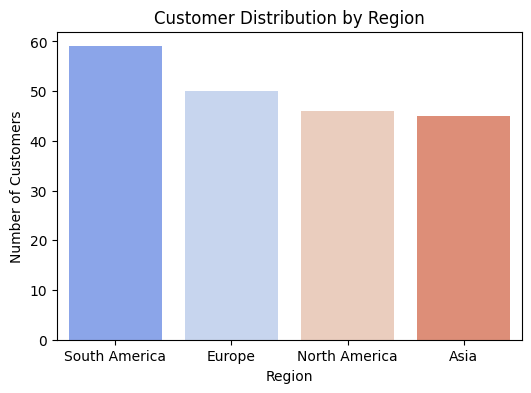

In [29]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='coolwarm')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

#### 2. Top-selling products

C:\Users\HP\AppData\Local\Temp\ipykernel_66788\756328628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


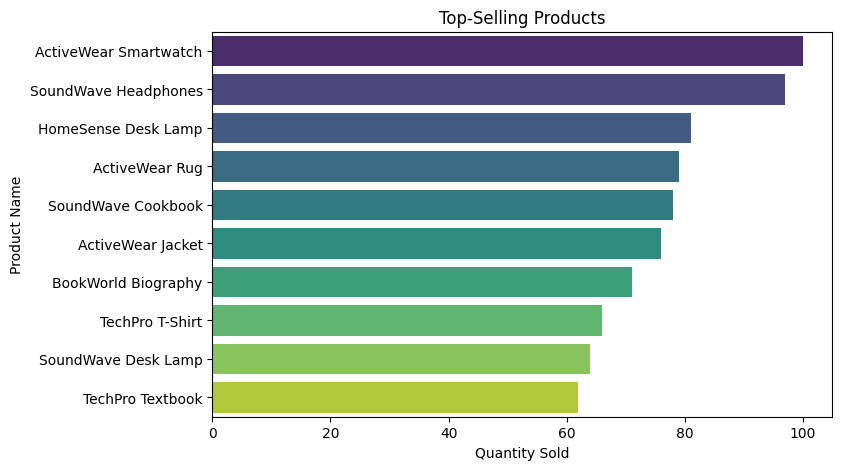

In [30]:
top_products = merged_df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Name')
plt.show()

#### 3. Revenue by product category

C:\Users\HP\AppData\Local\Temp\ipykernel_66788\3431500029.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='magma')


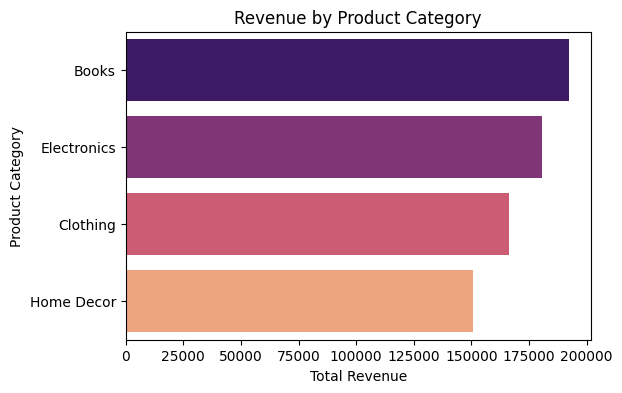

In [31]:

category_revenue = merged_df.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
sns.barplot(x=category_revenue.values, y=category_revenue.index, palette='magma')
plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show()


#### 4. Signup trends

In [32]:
print(customers['SignupDate'].head()) 
print(customers['SignupDate'].tail()) 

0    2022-07-10
1    2022-02-13
2    2024-03-07
3    2022-10-09
4    2022-08-15
Name: SignupDate, dtype: object
195    2022-06-07
196    2023-03-21
197    2022-02-27
198    2022-12-03
199    2023-06-11
Name: SignupDate, dtype: object


In [33]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'], dayfirst=True, errors='coerce')
invalid_dates = customers[customers['SignupDate'].isnull()]
print("Invalid Dates:\n", invalid_dates)
valid_customers = customers.dropna(subset=['SignupDate'])

Invalid Dates:
     CustomerID       CustomerName         Region SignupDate
1        C0002     Elizabeth Lutz           Asia        NaT
4        C0005        Laura Weber           Asia        NaT
6        C0007        Paul Graves           Asia        NaT
7        C0008           David Li  North America        NaT
8        C0009          Joy Clark         Europe        NaT
..         ...                ...            ...        ...
189      C0190     Alexander Lowe  South America        NaT
191      C0192        Sarah Arias  South America        NaT
194      C0195  Jeremy Mclaughlin  South America        NaT
196      C0197   Christina Harvey         Europe        NaT
197      C0198        Rebecca Ray         Europe        NaT

[121 rows x 4 columns]


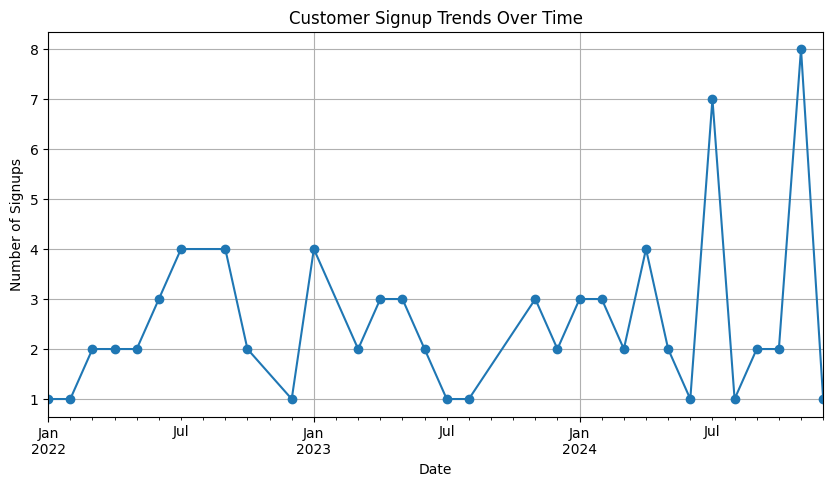

In [34]:
# Group and analyze signup trends
signup_trends = valid_customers.groupby(valid_customers['SignupDate'].dt.to_period('M')).size()
plt.figure(figsize=(10, 5))
signup_trends.plot(kind='line', marker='o')
plt.title('Customer Signup Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Signups')
plt.grid()
plt.show()


#### 5. Top customers by transaction volume

C:\Users\HP\AppData\Local\Temp\ipykernel_66788\1949135139.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.values, y=top_customers.index, palette='cividis')


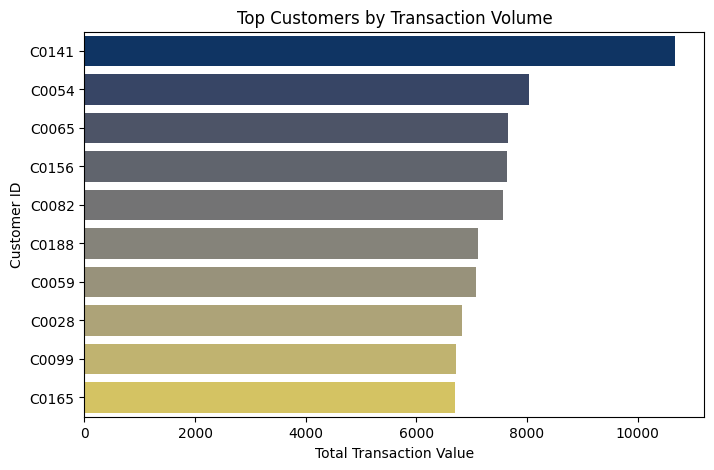

In [35]:

top_customers = merged_df.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.values, y=top_customers.index, palette='cividis')
plt.title('Top Customers by Transaction Volume')
plt.xlabel('Total Transaction Value')
plt.ylabel('Customer ID')
plt.show()
